In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
# Wrangling

In [30]:
iris = load_dataset('iris')

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
X = iris[['petal_width', 'sepal_width']]

In [33]:
kmeans = KMeans(3)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
iris['cluster'] = kmeans.predict(X)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


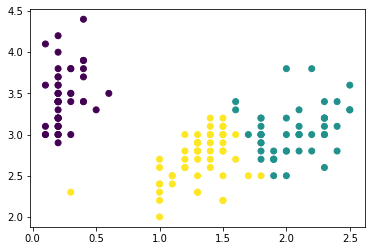

In [35]:
plt.scatter(iris.petal_width, iris.sepal_width, c=iris.cluster)

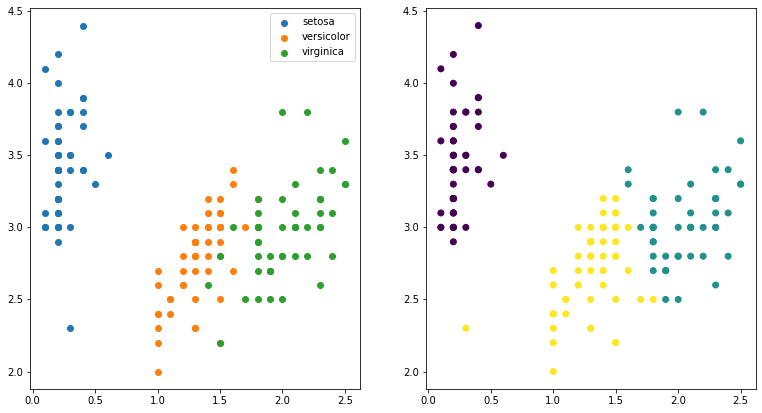

In [36]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species'):
    plt.scatter(subset.petal_width, subset.sepal_width, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.petal_width, iris.sepal_width, c=iris.cluster)

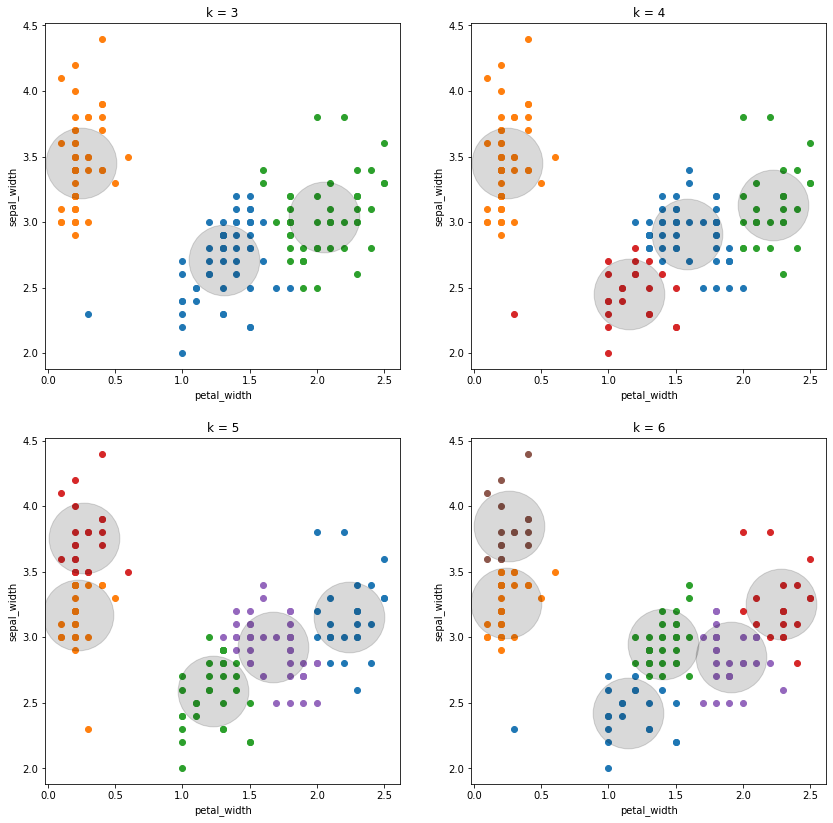

In [37]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.petal_width, subset.sepal_width, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y='sepal_width', x='petal_width', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

Takeway:With two features petal width and speal width, I would choose either 3 or 4 clusters.

In [38]:
X = iris[['petal_length','petal_width', 'sepal_width']]

In [39]:
kmeans = KMeans(3)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,petal_length,petal_width,sepal_width
0,1.462000,0.246000,3.428000
1,5.610638,2.042553,3.004255
2,4.281132,1.350943,2.754717


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_width')]

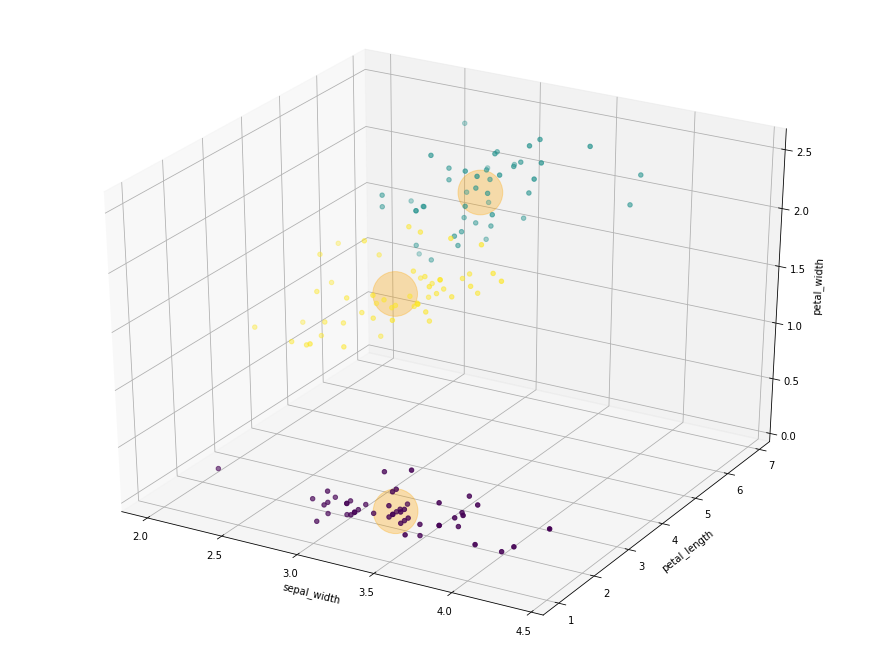

In [43]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_width, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_width, centers.petal_length, centers.petal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_width', ylabel='petal_length', zlabel='petal_width')

In [44]:
kmeans = KMeans(2)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [45]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,petal_length,petal_width,sepal_width
0,4.925253,1.681818,2.875758
1,1.492157,0.262745,3.409804


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_width')]

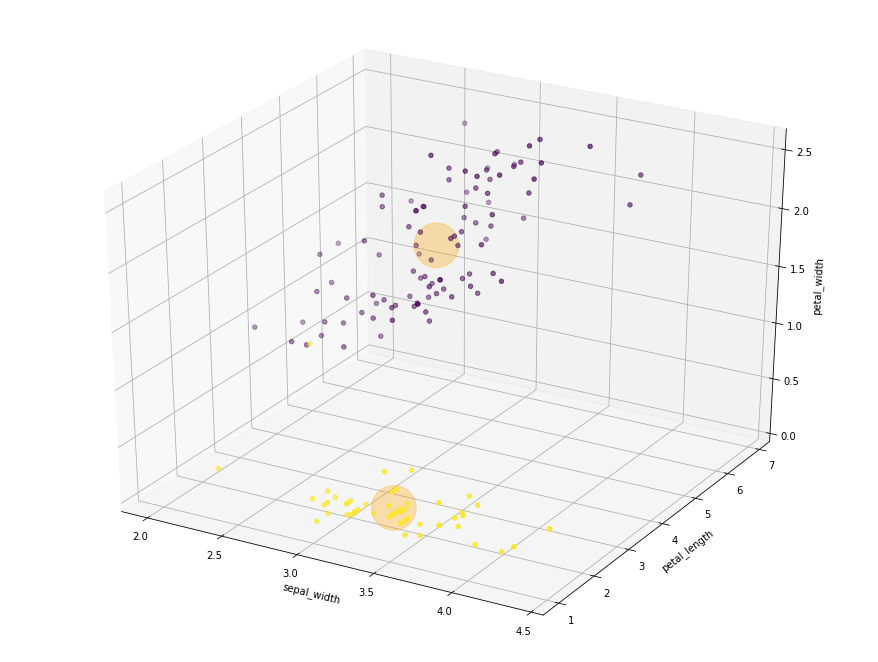

In [46]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_width, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_width, centers.petal_length, centers.petal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_width', ylabel='petal_length', zlabel='petal_width')

In [47]:
kmeans = KMeans(4)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

In [48]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,petal_length,petal_width,sepal_width
0,1.462000,0.246000,3.428000
1,5.870968,2.125806,3.100000
2,3.942857,1.207143,2.600000
3,4.834146,1.656098,2.885366


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_width')]

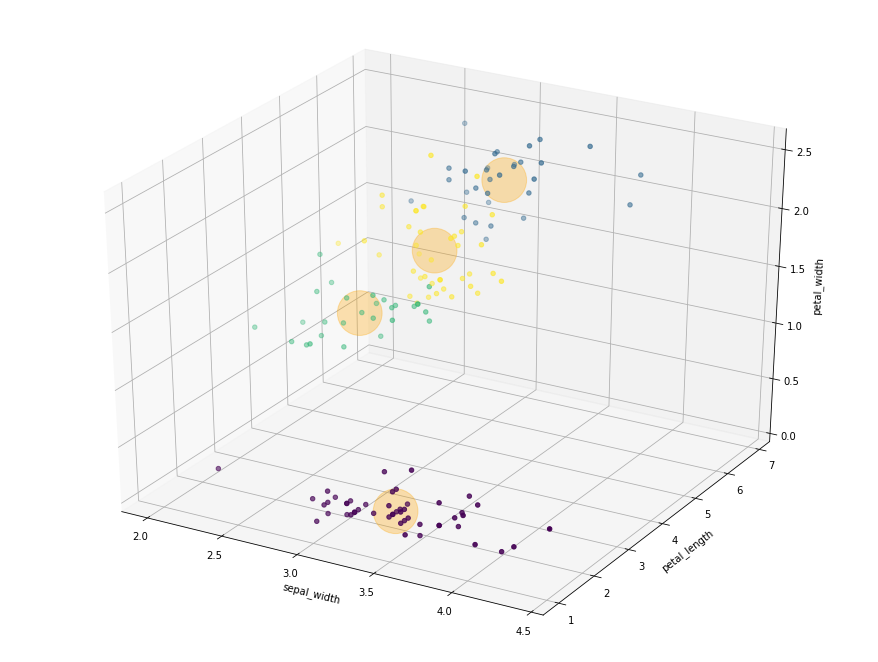

In [49]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_width, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_width, centers.petal_length, centers.petal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_width', ylabel='petal_length', zlabel='petal_width')

Takeaways: For three features combined together, I would probably either choose 2 clusters or three clusters.